# Pandas pour l'analyse de données

User guide : https://pandas.pydata.org/docs/user_guide/10min.html  

Cheat Sheet : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Complete course : https://stefaniemolin.com/pandas-workshop

In [2]:
#!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Les données

- tous les articles d'un laboratoire/chercheur/groupe/spécialité (ici le CREST)
- un objectif général : faire des statistiques
- un objectif particulier : comment commencer à analyser les données textuelles

## Importer Pandas

Charger les données

In [3]:
data = pd.read_excel("../data/data_hal_crest.xlsx")

In [4]:
type(data)

pandas.DataFrame

## Explorer les données

In [7]:
data.index

RangeIndex(start=0, stop=2308, step=1)

In [8]:
data.columns

Index(['docid', 'title', 'abstract', 'abstract_eng', 'publicationDate_tdate',
       'document_type', 'authors', 'date'],
      dtype='str')

In [9]:
data.shape

(2308, 8)

In [10]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   docid                  2308 non-null   int64         
 1   title                  2308 non-null   str           
 2   abstract               2308 non-null   str           
 3   abstract_eng           2049 non-null   str           
 4   publicationDate_tdate  2308 non-null   str           
 5   document_type          2301 non-null   str           
 6   authors                2308 non-null   str           
 7   date                   2308 non-null   datetime64[us]
dtypes: datetime64[us](1), int64(1), str(6)
memory usage: 144.4 KB


Sélectionner les 10 premiers éléments d'une colonne 

In [72]:
data["title"][0:10]

0    ["The effect of price magnitude on analysts' f...
1    ['Model-based Clustering with Missing Not At R...
2    ['Inferring the parameters of Taylor’s power l...
3    ['Nonparametric intensity estimation of spatia...
4    ['Impact of the Brexit vote announcement on lo...
5    ['Estimation of a source term in a quasi stead...
6    ['Contagion in Decentralized Lending Protocols...
7    ['Who Trains the Data for European Artificial ...
8    ['Learning with a linear loss function : exces...
9    ['Matrix-valued Time Series in High Dimension'...
Name: title, dtype: str

In [12]:
type(data["title"])

pandas.Series

Sélectionner deux colonnes

In [73]:
data[["title", "abstract"]][0:10]

,title,abstract
0,"[""The effect of price magnitude on analysts' f...",['Recent research in finance shows that the ma...
1,['Model-based Clustering with Missing Not At R...,"['Model-based unsupervised learning, as any le..."
2,['Inferring the parameters of Taylor’s power l...,['Taylor’s power law of fluctuation scaling ha...
3,['Nonparametric intensity estimation of spatia...,['We propose a random forest estimator for the...
4,['Impact of the Brexit vote announcement on lo...,['We examine how the Brexit announcement influ...
5,['Estimation of a source term in a quasi stead...,"['In previous work, we have analyzed the feasi..."
6,['Contagion in Decentralized Lending Protocols...,"[""We study financial contagion in Compound V2,..."
7,['Who Trains the Data for European Artificial ...,['Executive Summary Microworkers: The Forgotte...
8,['Learning with a linear loss function : exces...,"['Community detection, phase recovery, signed ..."
9,['Matrix-valued Time Series in High Dimension'...,['The objective of this thesis is to model mat...


## Manipuler un DataFrame

- sélectionner une colonne, une ligne, un élément
- comprendre l'indexation (iloc, loc)

Sélectionner une ligne

In [14]:
data.loc[10]

docid                                                              4061090
title                    ['Tail Risk Inference via Expectiles in Heavy-...
abstract                 ['Expectiles define the only law-invariant, co...
abstract_eng             ['Expectiles define the only law-invariant, co...
publicationDate_tdate                                 2023-01-01T00:00:00Z
document_type                                                         stat
authors                  ['Anthony Davison', 'Simone A. Padoan', 'Gille...
date                                                   2023-01-01 00:00:00
Name: 10, dtype: object

Sélectionner un élément

In [7]:
data.loc[10, "title"]

"['Tail Risk Inference via Expectiles in Heavy-Tailed Time Series']"

## Nettoyer le tableau

Regarder les données nulles

In [17]:
data["abstract"].isna().sum()

0

In [18]:
data["authors"].isna().sum()

0

## Analyser les données textuelles

- enlever les crochets des champs textes qui sont du bruit
- regrouper titre et abstract
- calculer la longueur du texte et sa distribution
- identifier les textes qui mentionnent explicitement "artifical intelligence"

In [8]:
data.head()

,docid,title,abstract,abstract_eng,publicationDate_tdate,document_type,authors,date
0,3026577,"[""The effect of price magnitude on analysts' f...",['Recent research in finance shows that the ma...,['Recent research in finance shows that the ma...,2021-01-01T00:00:00Z,shs.eco,"['Tristan Roger', 'Wael Bousselmi', 'Patrick R...",2021-01-01
1,4358212,['Model-based Clustering with Missing Not At R...,"['Model-based unsupervised learning, as any le...","['Model-based unsupervised learning, as any le...",2024-06-18T00:00:00Z,stat.ml,"['Aude Sportisse', 'Matthieu Marbac', 'Fabien ...",2024-06-18
2,4996040,['Inferring the parameters of Taylor’s power l...,['Taylor’s power law of fluctuation scaling ha...,['Taylor’s power law of fluctuation scaling ha...,2025-11-26T00:00:00Z,stat,"['Lionel Truquet', 'Joel E. Cohen', 'Paul Douk...",2025-11-26
3,5357551,['Nonparametric intensity estimation of spatia...,['We propose a random forest estimator for the...,['We propose a random forest estimator for the...,2025-11-10T00:00:00Z,stat.me,"['Christophe Biscio', 'Frédéric Lavancier']",2025-11-10
4,3026615,['Impact of the Brexit vote announcement on lo...,['We examine how the Brexit announcement influ...,['We examine how the Brexit announcement influ...,2020-01-01T00:00:00Z,shs.eco,"['Wael Bousselmi', 'Patrick Sentis', 'Marc Wil...",2020-01-01


Avec les méthodes pandas

In [21]:
data["abstract_net"] = (data["abstract"].str.replace("['", "")
    .str.replace('["','')
    .str.replace("']'",'')
    .str.replace('"]',''))

Pour nettoyer, on peut aussi définir une fonction pour une cellule, et l'appliquer sur toute une colonne

In [22]:
def nettoyer(texte):
    """
    Fonction de nettoyage
    """
    texte = str(texte)
    elements_a_remplacer = ['["', "']'",'"]',"['"]
    for element in elements_a_remplacer:
        texte = texte.replace(element, "")
    return texte

La méthode apply permet d'appliquer une fonction à l'ensemble des éléments d'une colonne

In [23]:
data["abstract_net"] = data["abstract"].apply(str).apply(nettoyer)
data["title_net"] = data["title"].apply(nettoyer)
data["texte"] = data["title_net"] + "\n" + data["abstract_net"] 
data["taille"] = data["texte"].apply(len)

Analyser les données

In [24]:
data["taille"].mean()
#pd.Series.mean?

1404.1312824956672

In [25]:
data["taille"].describe()

count     2308.000000
mean      1404.131282
std       1188.389576
min         59.000000
25%        761.000000
50%       1063.000000
75%       1534.250000
max      10608.000000
Name: taille, dtype: float64

Faire un petit graphique

<Axes: >

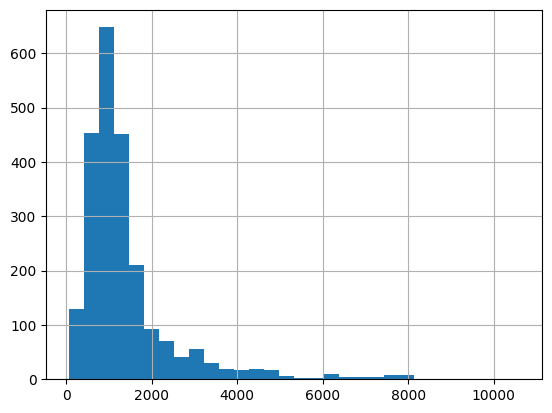

In [27]:
data["taille"].hist(bins=30)

Pandas permet d'indexer un Dataframe avec une série boléenne pour filtrer les lignes, et donc exprimer des conditions

Récupérer les outliers (textes trop grands)

In [30]:
data[data["taille"] > 8000]

,docid,title,abstract,abstract_eng,publicationDate_tdate,document_type,authors,date,abstract_net,title_net,texte,taille
7,4662589,['Who Trains the Data for European Artificial ...,['Executive Summary Microworkers: The Forgotte...,['Executive Summary Microworkers: The Forgotte...,2024-01-01T00:00:00Z,shs.socio,"['Milagros Miceli', 'Paola Tubaro', 'Antonio A...",2024-01-01,Executive Summary Microworkers: The Forgotten ...,Who Trains the Data for European Artificial In...,Who Trains the Data for European Artificial In...,10608
309,3610961,"['Essays on Firms Production Function, Markups...",['Firms production function link their use of ...,['Firms production function link their use of ...,2020-11-27T00:00:00Z,shs.eco,['Arthur Bauer'],2020-11-27,Firms production function link their use of in...,"Essays on Firms Production Function, Markups, ...","Essays on Firms Production Function, Markups, ...",8187
475,1668565,['Optimal Macroeconomic Policy under Uncertain...,"['The thesis consists of four chapters, which ...","['The thesis consists of four chapters, which ...",2017-12-07T00:00:00Z,shs.eco,['Olga Kuznetsova'],2017-12-07,"The thesis consists of four chapters, which di...",Optimal Macroeconomic Policy under Uncertainty...,Optimal Macroeconomic Policy under Uncertainty...,8040
1491,1668565,['Optimal Macroeconomic Policy under Uncertain...,"['The thesis consists of four chapters, which ...","['The thesis consists of four chapters, which ...",2017-12-07T00:00:00Z,shs.eco,['Olga Kuznetsova'],2017-12-07,"The thesis consists of four chapters, which di...",Optimal Macroeconomic Policy under Uncertainty...,Optimal Macroeconomic Policy under Uncertainty...,8040


Identifier les textes qui mentionne IA

In [43]:
# pd.Series.str.contains?

In [44]:
data["cont_IA"] = data["texte"].str.lower().str.contains("artificial intelligence|intelligence artificielle")
data["cont_algo"] = data["texte"].str.lower().str.contains("algorithm")
data["cont_ml"] = data["texte"].str.lower().str.contains("machine learning")

print("IA", data["cont_IA"].sum())
print("algorithms", data["cont_algo"].sum())
print("machine learning", data["cont_ml"].sum())

IA 19
algorithms 331
machine learning 53


In [52]:
data["texte"].str.lower().str.contains("intelligence artificielle").sum()

7

Extraire le mot et son contexte (10 caractères avant, 10 caractères après)

In [62]:
import re
re.findall("(.{10}artificial intelligence.{10})",
           "ceci est un texte artificial intelligence sd sdd dsds  sdd ")

[' un texte artificial intelligence sd sdd ds']

In [64]:
data["texte"].str.extract("(.{10}artificial intelligence.{10})").dropna()

,0
81,ed to as “artificial intelligence” (AI) has
411,o operate artificial intelligence (AI) syst
428,opment of artificial intelligence. Machine
851,bility of artificial intelligence is a grow
1186,labour of artificial intelligence in Latin
1340,"ed to as ""artificial intelligence"" (AI)\',"
1472,o operate artificial intelligence (AI) syst
1799,bility of artificial intelligence is a grow
2096,"needs for artificial intelligence, from sev"


In [71]:
def contains_words(texte):
    if "articial intelligence" in texte:
        return True
    if "AI" in texte:
        return True
    return False

data[data["texte"].apply(contains_words)].to_excel("extract.xlsx")

In [65]:
data.to_excel("save_df.xlsx")